In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset loaded: 5000 images and 50 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 2, 2, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │          25,650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,316,786 (77.50 MB)

 Trainable params: 290,354 (1.11 MB)

 Non-trainable params: 20,026,432 (76.39 MB)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.0272 - loss: 4.5955 - val_accuracy: 0.0430 - val_loss: 3.9783 - learning_rate: 1.0000e-05
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 364s 1s/step - accuracy: 0.0299 - loss: 4.4088 - val_accuracy: 0.0680 - val_loss: 3.9082 - learning_rate: 1.0000e-05
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 359s 1s/step - accuracy: 0.0403 - loss: 4.2666 - val_accuracy: 0.0870 - val_loss: 3.8150 - learning_rate: 1.0000e-05
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 391s 1s/step - accuracy: 0.0579 - loss: 4.0916 - val_accuracy: 0.1070 - val_loss: 3.6694 - learning_rate: 1.0000e-05
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.0725 - loss: 3.9349 - val_accuracy: 0.1370 - val_loss: 3.5244 - learning_rate: 1.0000e-05
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 358s 1s/step - accuracy: 0.0918 - loss: 3.7505 - val_accuracy: 0.1670 - val_loss: 3.3892 - learning_rate: 1.0000e-05
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 358s 1s/step - acc

Accuracy: 0.4780
Precision: 0.5029
Recall: 0.4780
F1-score: 0.4701
              precision  recall  f1-score   support
1              0.500000   0.500  0.500000    20.000
10             0.409091   0.450  0.428571    20.000
11             0.470588   0.400  0.432432    20.000
12             0.400000   0.400  0.400000    20.000
13             0.535714   0.750  0.625000    20.000
14             0.615385   0.800  0.695652    20.000
15             0.434783   0.500  0.465116    20.000
16             0.625000   0.500  0.555556    20.000
17             0.562500   0.450  0.500000    20.000
18             0.800000   0.400  0.533333    20.000
19             0.470588   0.400  0.432432    20.000
2              1.000000   0.150  0.260870    20.000
20             0.421053   0.400  0.410256    20.000
21             0.500000   0.500  0.500000    20.000
22             0.125000   0.100  0.111111    20.000
23             0.421053   0.400  0.410256    20.000
24             0.437500   0.350  0.388889    20.0

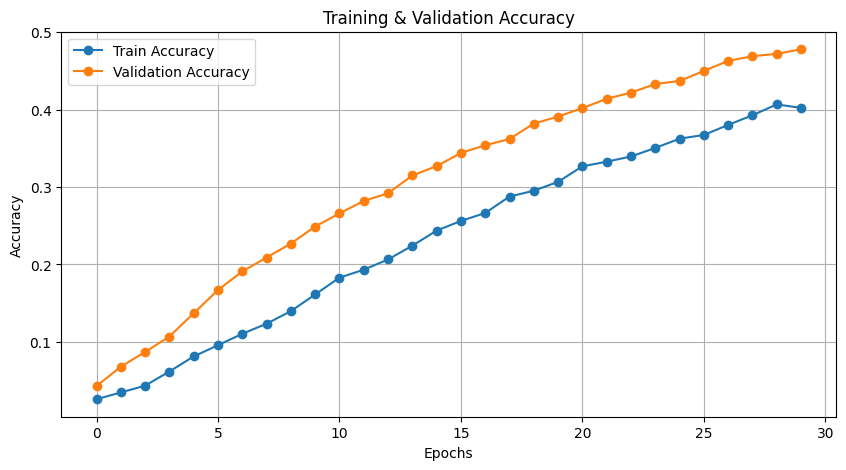

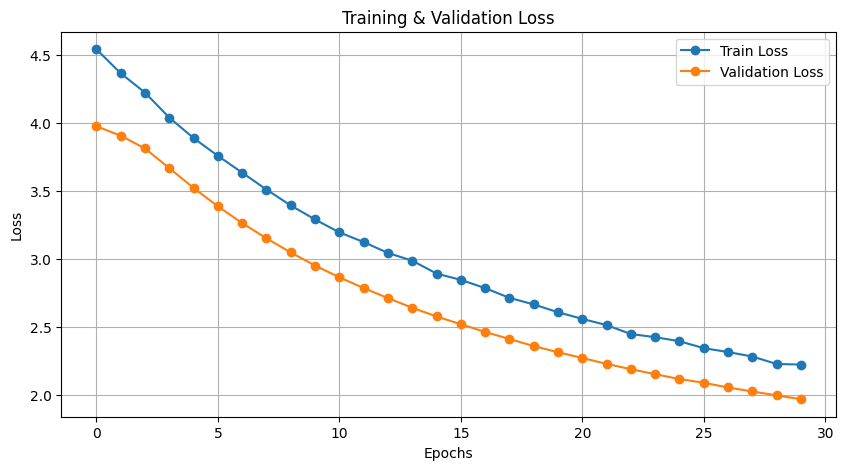

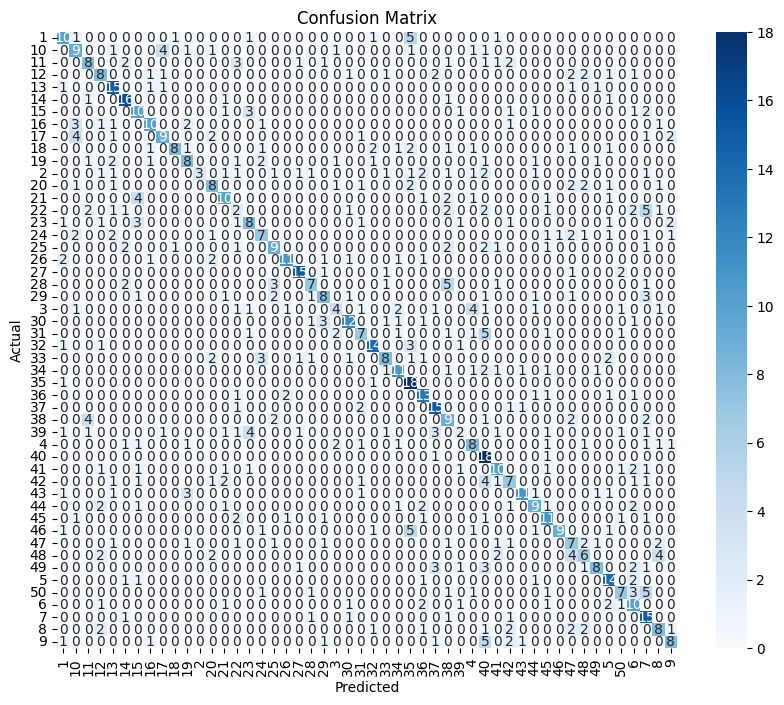

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Enable Mixed Precision for faster computation
tf.keras.mixed_precision.set_global_policy("mixed_float16")

# Enable XLA (Accelerated Linear Algebra) for TensorFlow optimization
tf.config.optimizer.set_jit(True)

# 1. Load and Preprocess the Dataset
def load_ekush_data(dataset_path):
    class_names = sorted(os.listdir(dataset_path))  # Compound character classes
    images, labels = [], []

    for label, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = tf.keras.utils.load_img(img_path, target_size=(64, 64), color_mode='rgb')
            img = tf.keras.utils.img_to_array(img) / 255.0  # Normalize images
            images.append(img)
            labels.append(label)

    return np.array(images, dtype=np.float32), np.array(labels, dtype=np.int32), class_names

dataset_path = "/content/drive/MyDrive/Datasets/Dataset_5k"
images, labels, class_names = load_ekush_data(dataset_path)
print(f"Dataset loaded: {len(images)} images and {len(class_names)} classes.")

# 2. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Convert dataset to TensorFlow Dataset format for faster loading
BATCH_SIZE = 16
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(len(X_train))
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

test_dataset = (
    tf.data.Dataset.from_tensor_slices((X_test, y_test))
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

# 3. Build Transfer Learning Model Using Sequential
base_model = VGG19(weights="imagenet", include_top=False, input_shape=(64, 64, 3))
for layer in base_model.layers[:140]:
    layer.trainable = False
for layer in base_model.layers[140:]:
    layer.trainable = True

# Build Sequential Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.4),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dense(len(class_names), activation="softmax", dtype="float32")  # Output as float32
])

# Compile model with lower learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

# Learning Rate Scheduler & Early Stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# 4. Train the Model
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=test_dataset,
    verbose=1,
    callbacks=[lr_scheduler, early_stopping]
)

# 5. Evaluate the Model
y_pred = np.argmax(model.predict(X_test, batch_size=BATCH_SIZE), axis=1)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification report
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Save model and report
model.save("Sequential_1.h5")  # ✅ Save as Sequential_1
report_df.to_csv("sequential_1_classification_report.csv")

# 6. Plot Training Results
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.title("Training & Validation Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.title("Training & Validation Loss")
plt.show()

# 7. Compute & Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
